# 1 Getting started

In [2]:
from __future__ import print_function

import numpy as np
import MNISTtools
from matplotlib import pyplot

# 2 Read MNIST Data

In [3]:
xtrain, ltrain = MNISTtools.load(dataset = "training", path = "/datasets/MNIST")
print(xtrain.shape)
print(ltrain.shape)

(784, 60000)
(60000,)


1) Using MNISTtools.load, store the images and labels from the training datasets into two variables,
respectively, xtrain and ltrain. What are the shapes of both variables? What is the size of the
training dataset? What is the feature dimension?

shape of xtrain: (784, 60000)

shape of ltrain: (60000, )

size of trainig dataset: 60000

feature dimension: 784

2) Display the image of index 42 and check that its content corresponds to its label.

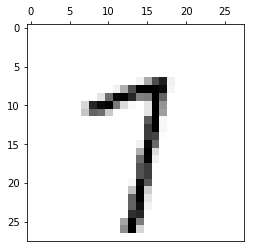

In [4]:
MNISTtools.show(xtrain[:, 42])

3) What is the range of xtrain (minimum and maximum values)? What is the type of xtrain?

In [5]:
print('The type of xtrain is {}'.format(type(xtrain)))
print('The range of xtrain is [{0}, {1}]'.format(xtrain.min(), xtrain.max()))

The type of xtrain is <type 'numpy.ndarray'>
The range of xtrain is [0, 255]


4) Create a function that takes a collection of images (such as xtrain) and return a modified version in the range [-1, 1]
of type float64. Update xtrain accordingly.

In [6]:
def normalize_MNIST_images(x):
    return np.interp(x, (x.min(), x.max()), (-1, +1)).astype(np.float64)

In [7]:
xtrain = normalize_MNIST_images(xtrain)
print('The shape of xtrain is {}'.format(xtrain.shape))
print('The range of xtrain is [{0}, {1}]'.format(xtrain.min(), xtrain.max()))

The shape of xtrain is (784, 60000)
The range of xtrain is [-1.0, 1.0]


5) Using integer array indexing, complete the following function

In [8]:
def label2onehot(lbl):
    d = np.zeros((lbl.max() + 1, lbl.size))
    d[lbl, np.arange(0, lbl.size)] = 1
    return d

In [9]:
dtrain = label2onehot(ltrain)
print('The shape of dtrain is {}'.format(dtrain.shape))
print('The one-hot code for index 42 is {}'.format(dtrain[:, 42]))

The shape of dtrain is (10, 60000)
The one-hot code for index 42 is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


6) Complete the following function such that ltrain == onehot2label(dtrain).

In [10]:
def onehot2label(d):
    lbl = d.argmax(axis=0)
    return lbl

In [11]:
assert np.array_equal(ltrain, onehot2label(dtrain))

# 3 Activation functions

7) Create a function that returns an array whose columns are the 60000 predictions y from an array whose columns are
the 60000 vectors a.

In [12]:
def softmax(a):
    m = a.max(axis=0)
    temp = np.exp(a - m)
    return temp / temp.sum(axis=0)

8) Show that $\frac{\partial g(\boldsymbol{a})}{\partial a_i} = g(\boldsymbol{a})_i(1 - g(\boldsymbol{a})_i)$.

$\frac{\partial g(\boldsymbol{a})}{\partial a_i} = \frac{exp(a_i)\sum_{j=1}^{N} (a_j) - exp^2(a_i)}{(\sum_{j=1}^{N} (a_j))^2} = \frac{exp(a_i)}{\sum_{j=1}^{N} (a_j)} \frac{\sum_{j=1}^{N} (a_j) - exp(a_i)}{\sum_{j=1}^{N} (a_j)} = \frac{exp(a_i)}{\sum_{j=1}^{N} (a_j)} (1-\frac{exp(a_i)}{\sum_{j=1}^{N} (a_j)}) =g(\boldsymbol{a})_i(1 - g(\boldsymbol{a})_i) $

9) Show that $\frac{\partial g(\boldsymbol{a})}{\partial a_j} = -g(\boldsymbol{a})_i g(\boldsymbol{a})_j$ for $j\neq i$.

$\frac{\partial g(\boldsymbol{a})}{\partial a_j} = \frac{0 - exp(a_i)exp(a_j)}{(\sum_{j=1}^{N} (a_j))^2} = -\frac{exp(a_i)}{\sum_{j=1}^{N} (a_j)} \frac{exp(a_j)}{\sum_{j=1}^{N} (a_j)} = -g(\boldsymbol{a})_i g(\boldsymbol{a})_j$

10) write a function softmaxp()

In [13]:
def softmaxp(a, e):
    delta = np.zeros((a.shape[0], a.shape[1]))
    ga = softmax(a)
    for k in range(a.shape[1]):
        ga_k = ga[:, k]
        e_k = e[:, k]
        delta[:, k] = np.multiply(ga_k, e_k) - np.dot(ga_k, e_k) * ga_k
    return delta

11) Complete the following script to check your function softmaxp as follows

In [14]:
eps = 1e-6 # finite difference step
a = np.random.randn(10, 200) # random inputs
e = np.random.randn(10, 200) # random directions
diff = softmaxp(a, e)
diff_approx = (softmax(a + eps * e) - softmax(a)) / eps
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print(rel_error, 'should be smaller than 1e-6')

5.004681621313714e-07 should be smaller than 1e-6


12) For the hidden layers, we will be using $ReLU(\boldsymbol{a})i = max(a_i, 0)$. Write two functions:

In [15]:
def relu(a):
    temp = np.zeros((a.shape[0], a.shape[1]))
    for k in range(a.shape[1]):
        temp[:, k] = np.maximum(a[:, k], np.zeros(a.shape[0]))
    return temp

In [16]:
def relup(a, e):
    delta = np.zeros((a.shape[0], a.shape[1]))
    ga = relu(a)
    for k in range(a.shape[1]):
        gpa = np.zeros((a.shape[0], a.shape[0]))
        for i in range(a.shape[0]):
            if ga[i, k] > 0:
                gpa[i, i] = 1
        delta[:, k] = np.matmul(gpa, e[:, k])
    return delta

In [17]:
eps = 1e-6 # finite difference step
a = np.random.randn(10, 200) # random inputs
e = np.random.randn(10, 200) # random directions
diff = relup(a, e)
diff_approx = (relu(a + eps * e) - relu(a)) / eps
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print(rel_error, 'should be smaller than 1e-6')

3.721347147778074e-11 should be smaller than 1e-6


# 4 Backpropagation

13) Use the following function to create/initialize your shallow network as follows

In [24]:
def init_shallow(Ni, Nh, No):
    b1 = np.random.randn(Nh, 1) / np.sqrt((Ni+1.)/2.)
    W1 = np.random.randn(Nh, Ni) / np.sqrt((Ni+1.)/2.)
    b2 = np.random.randn(No, 1) / np.sqrt((Nh+1.))
    W2 = np.random.randn(No, Nh) / np.sqrt((Nh+1.))
    return W1, b1, W2, b2

In [25]:
Ni = xtrain.shape[0]
Nh = 64
No = dtrain.shape[0]
netinit = init_shallow(Ni, Nh, No)

14) Complete the function forwardprop shallow to evaluate the prediction of our initial network:

In [26]:
def forwardprop_shallow(x, net):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    return y

In [27]:
yinit = forwardprop_shallow(xtrain, netinit)

15) Complete the function eval loss:

In [59]:
def eval_loss(y, d):
    loss = -1.0 * np.sum(d * np.log(y))
    return loss / (d.shape[0] * d.shape[1])

In [60]:
print(eval_loss(yinit, dtrain), 'should be around .26')

0.24738259773078927 should be around .26


16) Complete the function eval perfs:

In [48]:
def eval_perfs(y, lbl):
    return 1.0 * np.sum(np.not_equal(onehot2label(y), lbl)) / y.shape[1]

In [49]:
print(eval_perfs(yinit, ltrain))

0.8573


17) Complete the following function update shallow

In [64]:
def update_shallow(x, d, net, gamma=.05):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    Ni = W1.shape[1]
    Nh = W1.shape[0]
    No = W2.shape[0]
    gamma = gamma / x.shape[1] # normalized by the training dataset size  
    # Forward phase
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    e = -1.0 * d / y
    # Error evaluation
    delta2 = softmaxp(a2, e)
    delta1 = relup(a1, (W2.T.dot(delta2) + b2.T.dot(delta2)))
    # gradient update
    W2 = W2 - gamma * delta2.dot(h1.T)
    W1 = W1 - gamma * delta1.dot(x.T)
    b2 = b2 - gamma * delta2.sum(axis=1).reshape (No, 1)
    b1 = b1 - gamma * delta1.sum(axis=1).reshape (Nh, 1)
    
    return W1, b1, W2, b2

Show that $(\nabla_y E)_i = -\frac{di}{yi}$

$(\nabla_y E)_i = \frac{\partial(-\sum_{i=1}^{N} d_i \log y_i)}{\partial y_i} = \frac{0 + \dotsb + \partial d_i \log y_i + \dotsc + 0}{\partial y_i} = - \frac{d_i}{y_i}$

18) Using update shallow, complete the function backprop shallow

In [51]:
def backprop_shallow(x, d, net, T, gamma=.05):
    lbl = onehot2label(d)
    for t in range(0, T):
        net = update_shallow(x, d, net, gamma)
        y = forwardprop_shallow(x, net)
        print('iter:', t+1)
        print('loss:', eval_loss(y, d))
        print('pref:', eval_perfs(y, lbl))
    return net

In [66]:
nettrain = backprop_shallow(xtrain, dtrain, netinit, 100)

iter: 1
loss: 0.22099507165757765
pref: 0.795466666667
iter: 2
loss: 0.21015817470212003
pref: 0.741583333333
iter: 3
loss: 0.202499346740826
pref: 0.69365
iter: 4
loss: 0.19647813281608967
pref: 0.615566666667
iter: 5
loss: 0.19148352419673106
pref: 0.61185
iter: 6
loss: 0.18683624671249616
pref: 0.528983333333
iter: 7
loss: 0.18293182190567744
pref: 0.564016666667
iter: 8
loss: 0.17915014694252585
pref: 0.472616666667
iter: 9
loss: 0.17590771106225384
pref: 0.536166666667
iter: 10
loss: 0.17263940566454006
pref: 0.4423
iter: 11
loss: 0.16951283417931554
pref: 0.507333333333
iter: 12
loss: 0.16593641132780126
pref: 0.416383333333
iter: 13
loss: 0.16285968341744905
pref: 0.465483333333
iter: 14
loss: 0.15848981549602434
pref: 0.38505
iter: 15
loss: 0.15577565052956713
pref: 0.4227
iter: 16
loss: 0.1505532626025688
pref: 0.3538
iter: 17
loss: 0.14855748278594075
pref: 0.388366666667
iter: 18
loss: 0.14284039270922214
pref: 0.3297
iter: 19
loss: 0.14148930012996225
pref: 0.361366666667
i

19) Load the testing dataset into two variables xtest and ltest. What is the size of the testing set?
Evaluate the performance of your network on the testing dataset.

In [67]:
xtest, ltest = MNISTtools.load(dataset = "testing", path = "/datasets/MNIST")
print(xtest.shape)
print(ltest.shape)

(784, 10000)
(10000,)


In [74]:
xtest = normalize_MNIST_images(xtest)
ytest = forwardprop_shallow(xtest, nettrain)
print('Performance on the testing dataset:', eval_perfs(ytest, ltest))

Performance on the testing dataset: 0.1259


20) Using update shallow, complete and run for 5 epochs the function backprop minibatch shallow:

In [87]:
def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=.05):
    N = x.shape[1]
    lbl = onehot2label(d)
    for t in range(0, T):
        for l in range(0, (N+B-1)/B):
            idx = np.arange(B*l, min(B*(l+1), N))
            net = update_shallow(x[:, idx], d[:, idx], net, gamma)
        y = forwardprop_shallow(x, net)
        print('iter:', t+1)
        print('loss:', eval_loss(y, d))
        print('pref:', eval_perfs(y, lbl))
    return net

In [88]:
netminibatch = backprop_minibatch_shallow(xtrain, dtrain, netinit, 5, B=100)

iter: 1
loss: 0.03328349740419724
pref: 0.103483333333
iter: 2
loss: 0.026496658023473663
pref: 0.0818333333333
iter: 3
loss: 0.0220861297376514
pref: 0.0672666666667
iter: 4
loss: 0.019136917544357267
pref: 0.05785
iter: 5
loss: 0.017160353810890448
pref: 0.0517833333333


21) Compare the performance of this new network on the testing dataset.

In [89]:
ytest = forwardprop_shallow(xtest, netminibatch)
print('Performance on the testing dataset:', eval_perfs(ytest, ltest))

Performance(minbatch) on the testing dataset: 0.0566


# 5 Experiment with network topology and learning parameters

In [98]:
def main_process(Nh=64, gamma=.05, B=100, T=5):
    netinit = init_shallow(Ni, Nh, No)
    netminibatch = backprop_minibatch_shallow(xtrain, dtrain, netinit, T, B=B, gamma=gamma)
    ytest = forwardprop_shallow(xtest, netminibatch)
    print('Performance on the testing dataset:', eval_perfs(ytest, ltest))  

22) Try with Nh = 16 and Nh = 256 number of hidden units. Look at the training and testing errors.
Interpret the results.

In [99]:
main_process(Nh=16)

iter: 1
loss: 0.03784289534260053
pref: 0.1144
iter: 2
loss: 0.03249615714951529
pref: 0.09765
iter: 3
loss: 0.030372753701103303
pref: 0.0897666666667
iter: 4
loss: 0.02722050321314488
pref: 0.0801833333333
iter: 5
loss: 0.025548431656543517
pref: 0.0748333333333
Performance on the testing dataset: 0.074


In [100]:
main_process(Nh=256)

iter: 1
loss: 0.02968378244923598
pref: 0.0923666666667
iter: 2
loss: 0.022057718541865903
pref: 0.0671
iter: 3
loss: 0.01777024450980008
pref: 0.0526333333333
iter: 4
loss: 0.015067590854054649
pref: 0.0444833333333
iter: 5
loss: 0.013057687565317458
pref: 0.0382166666667
Performance on the testing dataset: 0.0422


23) Try different step sizes: $\gamma=.02$ and $\gamma=.08$ . Look at the training and testing errors. Interpret the
results.

In [101]:
main_process(gamma=.02)

iter: 1
loss: 0.0377927403561074
pref: 0.110566666667
iter: 2
loss: 0.03053799921507424
pref: 0.0899333333333
iter: 3
loss: 0.026793430927492243
pref: 0.0783833333333
iter: 4
loss: 0.0241458492991156
pref: 0.0695
iter: 5
loss: 0.02216824749621067
pref: 0.0637333333333
Performance on the testing dataset: 0.0655


In [102]:
main_process(gamma=.08)

iter: 1
loss: 0.032558241669444606
pref: 0.102066666667
iter: 2
loss: 0.025899467975362214
pref: 0.0821
iter: 3
loss: 0.021378142912993923
pref: 0.0672
iter: 4
loss: 0.01856633824397229
pref: 0.0589333333333
iter: 5
loss: 0.0168440556233523
pref: 0.0530666666667
Performance on the testing dataset: 0.0558


24) Try with minibatches of sizes: B = 50 and B = 200. Look at the training and testing errors. Interpret the results.

In [103]:
main_process(B=50)

iter: 1
loss: 0.026457507746656492
pref: 0.0811166666667
iter: 2
loss: 0.019876275570738993
pref: 0.0611
iter: 3
loss: 0.016793942688778506
pref: 0.0512
iter: 4
loss: 0.01477494319205105
pref: 0.0453833333333
iter: 5
loss: 0.013236229979162309
pref: 0.0408666666667
Performance on the testing dataset: 0.0453


In [104]:
main_process(B=200)

iter: 1
loss: 0.03663839503476053
pref: 0.113233333333
iter: 2
loss: 0.028753850816845332
pref: 0.08815
iter: 3
loss: 0.024749061577572624
pref: 0.075
iter: 4
loss: 0.02212076557970242
pref: 0.0666333333333
iter: 5
loss: 0.02014415454182866
pref: 0.0602166666667
Performance on the testing dataset: 0.0604


25) Try minibatch gradient descent with more epochs. What is the best testing error that you can achieved?

In [105]:
main_process(T=10)

iter: 1
loss: 0.03279011023127361
pref: 0.10245
iter: 2
loss: 0.025253698887876843
pref: 0.0772333333333
iter: 3
loss: 0.02095312121912967
pref: 0.0644333333333
iter: 4
loss: 0.0181216352157772
pref: 0.0551666666667
iter: 5
loss: 0.0160197126653291
pref: 0.0484333333333
iter: 6
loss: 0.014499008991198183
pref: 0.0437166666667
iter: 7
loss: 0.013256992446599546
pref: 0.0399333333333
iter: 8
loss: 0.012298439883220462
pref: 0.0368166666667
iter: 9
loss: 0.011534316708511096
pref: 0.0344833333333
iter: 10
loss: 0.010877319074970013
pref: 0.0325666666667
Performance on the testing dataset: 0.0384


In [106]:
main_process(T=20)

iter: 1
loss: 0.03355739450160582
pref: 0.10205
iter: 2
loss: 0.027699477425903122
pref: 0.0844
iter: 3
loss: 0.024069476367092082
pref: 0.0739
iter: 4
loss: 0.02112860990454647
pref: 0.0643666666667
iter: 5
loss: 0.01882449553714287
pref: 0.0579
iter: 6
loss: 0.016676869015463607
pref: 0.0512666666667
iter: 7
loss: 0.015197921176321972
pref: 0.04605
iter: 8
loss: 0.013946544941003574
pref: 0.0422333333333
iter: 9
loss: 0.012779966543595544
pref: 0.0382833333333
iter: 10
loss: 0.011887868043128491
pref: 0.0355833333333
iter: 11
loss: 0.011131799609425064
pref: 0.0332
iter: 12
loss: 0.01043995114239194
pref: 0.0311166666667
iter: 13
loss: 0.009819531512687338
pref: 0.02925
iter: 14
loss: 0.009273518282679968
pref: 0.0276166666667
iter: 15
loss: 0.008832588833555708
pref: 0.0262666666667
iter: 16
loss: 0.008412561472307421
pref: 0.0248333333333
iter: 17
loss: 0.008031627153372805
pref: 0.0239
iter: 18
loss: 0.007691058832576363
pref: 0.0227666666667
iter: 19
loss: 0.007377663328841161
pr

Best performance is around 0.03